# Differentation using numpy functions:

- **Forward differences:** np.diff( )

https://numpy.org/doc/stable/reference/generated/numpy.diff.html


- **Central differences:** np.gradient( ) along a specific axis.

https://numpy.org/doc/stable/reference/generated/numpy.gradient.html

In [1]:
# Import libraries

import numpy as np

import matplotlib.pyplot as plt

In [4]:
# Test vector

a = np.array([0,1,2,3,4,5,6,7,8,9])

b = np.diff(a)

c = np.gradient(a, 0.1, axis = 0)

print(a, a.shape)

print(b, b.shape)

print(c, c.shape)


#print(len(a))
#print(len(b))
#print(len(c))

[0 1 2 3 4 5 6 7 8 9] (10,)
[1 1 1 1 1 1 1 1 1] (9,)
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.] (10,)


### Example:

Find the derivative of:

$y(x) = \sin(x)$


We know that:

$y'(x) = \cos(x)$

In [5]:
# step size
h = 0.1

# define grid
x = np.arange(-2*np.pi, 2*np.pi, h) 

# compute function
y = np.sin(x) 

In [18]:
# forward differences
forward_diff = np.diff(y)/h 

# central differences
central_diff = np.gradient(y, h, axis=0)

In [19]:
print(x.shape)
print(y.shape)

print(forward_diff.shape)
print(central_diff.shape)

(126,)
(126,)
(125,)
(126,)


In [20]:
x_fdiff = x[:-1] 

# compute exact solution
exact_solution = np.cos(x_fdiff) 

## Plotting:


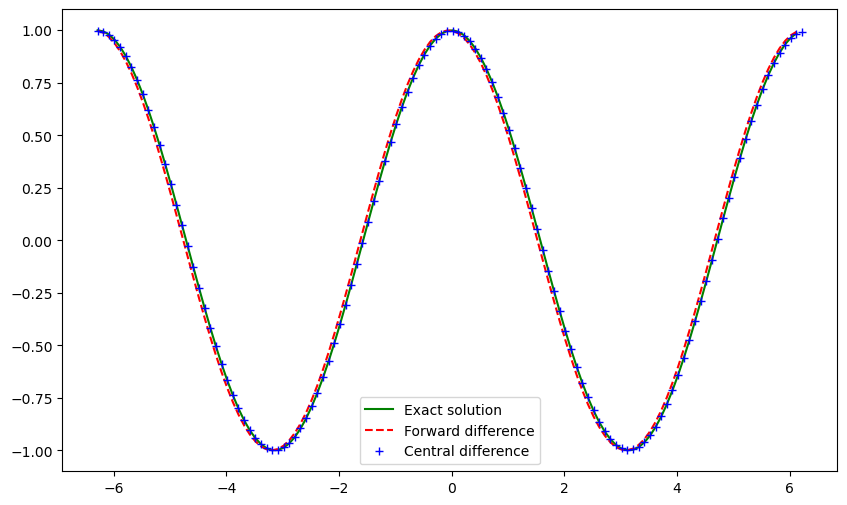

In [21]:
# Figure environment:

plt.figure(figsize = (10, 6))
plt.plot(x_fdiff, exact_solution, c = 'green', linestyle ='-', label = 'Exact solution')
plt.plot(x_fdiff, forward_diff, c = 'red', linestyle ='--', label = 'Forward difference')
plt.plot(x, central_diff, c = 'blue', marker = '+', linestyle =' ' , label = 'Central difference')
plt.legend()
plt.show()

### Error calculation:

In [22]:
# Define error array

eps_fd = np.abs(forward_diff - exact_solution)

eps_fd_max = np.max(eps_fd )

print(eps_fd_max)


# Define rms error array

eps_fd_rms = (forward_diff - exact_solution)**2

eps_fd_rms_av = np.sqrt(np.mean(eps_fd_rms))

print(eps_fd_rms_av)

0.04997545591097786
0.03543885325177162


## Iterative errors:

In [27]:
# define step size
h = 1

# define number of iterations to perform
iterations = 10

# list to store our step sizes
step_size = [] 

# list to store max error for each step size
max_error1 = [] 
max_error2 = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    
    # store this step size
    step_size.append(h) 
    
    # compute new grid
    x = np.arange(0, 2 * np.pi, h) 
    
    # compute function value at grid
    y = np.sin(x) 
    
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    central_diff = np.gradient(y, h, axis=0) 
    
    # compute corresponding grid
    x_fdiff = x[:-1]
    
    # compute exact solution
    exact_solution = np.cos(x_fdiff) 
    
    # Compute max error between numerical derivative and exact solution
    max_error1.append(np.max(np.abs(exact_solution - forward_diff)))
    max_error2.append(np.max(np.abs(exact_solution - central_diff[:-1])))

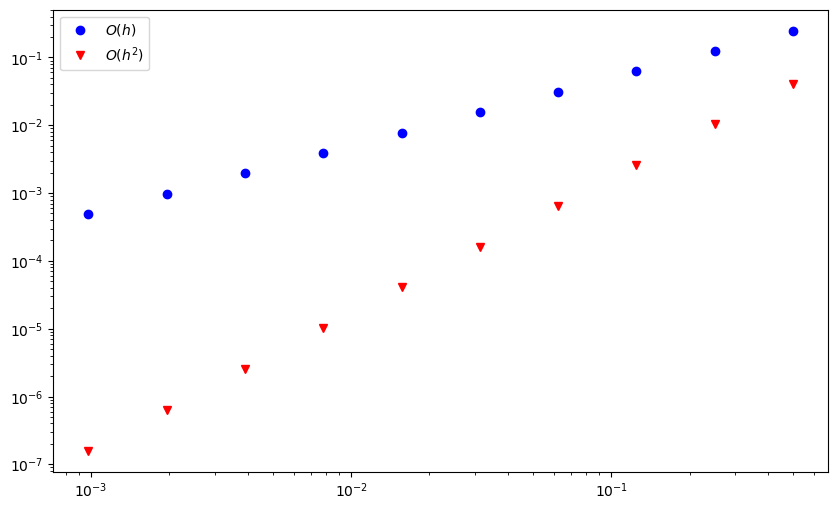

In [28]:
# produce log-log plot of max error versus step size
plt.figure(figsize = (10, 6))
plt.loglog(step_size, max_error1, 'o', c = 'blue', label = r'$O(h)$')
plt.loglog(step_size, max_error2, 'v', c = 'red', label = r'$O(h^2)$')
plt.legend()
plt.show()

In [29]:
# Get coefficients

a1, b1 = np.polyfit(np.log10(step_size), np.log10(max_error1), 1)
a2, b2 = np.polyfit(np.log10(step_size), np.log10(max_error2), 1)

# Print to check
print('slope1 =', a1, ' intercept1 =', b1)
print('slope2 =', a2, ' intercept2 =', b2)

# Get fitting function
fit_max_error1 = a1*np.log10(step_size) + b1
fit_max_error2 = a2*np.log10(step_size) + b2

slope1 = 0.9992185747411657  intercept1 = -0.3027943671463184
slope2 = 1.998785302628068  intercept2 = -0.7808863771504365


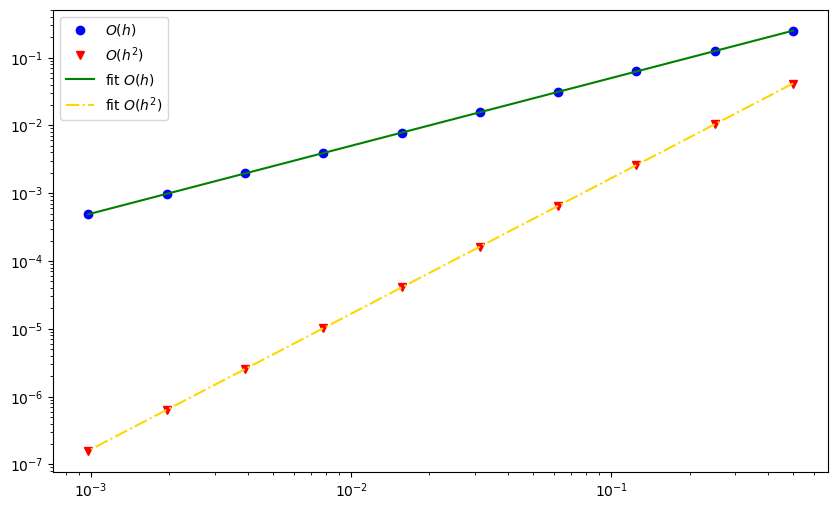

In [30]:
# produce log-log plot of max error versus step size

plt.figure(figsize = (10, 6))

plt.loglog(step_size, max_error1, 'o', c = 'blue', label = r'$O(h)$')
plt.loglog(step_size, max_error2, 'v', c = 'red', label = r'$O(h^2)$')
plt.loglog(step_size, 10**fit_max_error1, linestyle = '-', c = 'green', label = r'fit $O(h)$')
plt.loglog(step_size, 10**fit_max_error2, linestyle = '-.', c = 'gold', label = r'fit $O(h^2)$')

plt.legend()
plt.show()

## Example: derivatives of a time series

In [33]:
import pandas as pd

In [34]:
data_frame1 = pd.read_csv("../sample-data/temperature-anomaly.csv")

In [36]:
#print(data_frame1)

In [38]:
tropics_data = data_frame1.loc[data_frame1["Entity"] == "Tropics"]

In [40]:
#print(tropics_data)

In [41]:
# Place the data into objects:

years = np.array(tropics_data["Year"])

temperature = np.array(tropics_data["Median temperature anomaly from 1961-1990 average"])

In [43]:
#print(years)

In [46]:
#print(years.shape, temperature.shape)

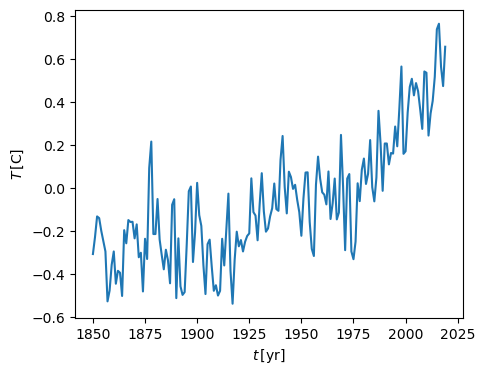

In [60]:
# produce log-log plot of max error versus step size

plt.figure(figsize = (5,4))

plt.plot(years, temperature)

plt.xlabel(r"$t\,\rm [yr]$")
plt.ylabel(r"$T\,\rm [C]$")

#plt.legend()
plt.show()

### Derivative:

In [52]:
# Get delta_x diff into an object

delta_year = years[1] - years[0]

print(delta_year)

1


In [53]:
# Central diff method
central_diff = np.gradient(temperature, delta_year, axis=0)

print(central_diff.shape)

(170,)


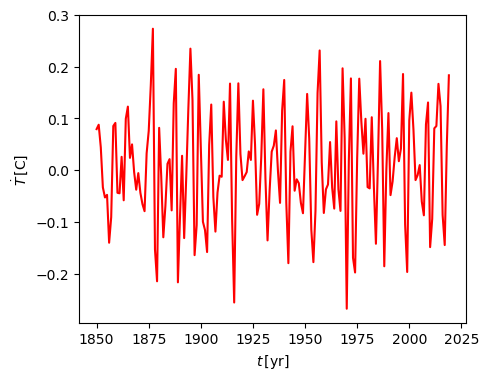

In [56]:
# Derivative plot

plt.figure(figsize = (5, 4))

plt.plot(years, central_diff, color = "red")

plt.xlabel(r"$t\,\rm [yr]$")
plt.ylabel(r"$\dot{T}\,\rm [C]$")

#plt.legend()
plt.show()

### Smooth the data via interpolation:

In [57]:
from scipy import interpolate

In [58]:
#y_spline = interpolate.spline(tropics_data["Year"], tropics_data["Median temperature anomaly from 1961-1990 average"], x_smooth)


tck2 = interpolate.splrep(years, temperature, s=3)

temp_spline = interpolate.splev(years, tck2, der=0)

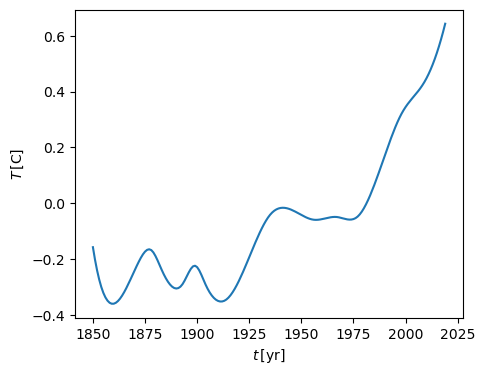

In [61]:
# Interpolation result

plt.figure(figsize = (5, 4))

plt.plot(years, temp_spline)

plt.xlabel(r"$t\,\rm [yr]$")
plt.ylabel(r"$T\,\rm [C]$")
#plt.legend()
plt.show()

### Derivative on the smoothed data:

In [63]:
central_diff2 = np.gradient(temp_spline, delta_year, axis=0)

#print(central_diff.shape)

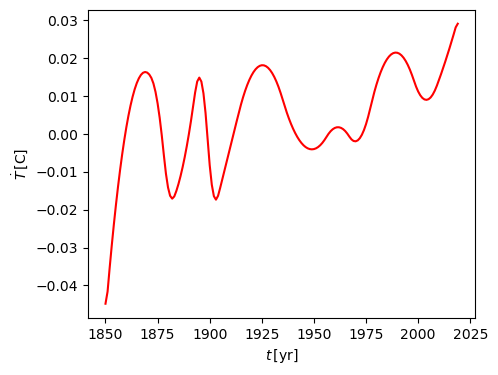

In [64]:
# New derivative plot

plt.figure(figsize = (5, 4))

plt.plot(years, central_diff2, color = "red")

plt.xlabel(r"$t\,\rm [yr]$")
plt.ylabel(r"$\dot{T}\,\rm [C]$")
#plt.legend()
plt.show()